In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, roc_auc_score,
                             ConfusionMatrixDisplay)

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

In [38]:
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())
print("\nData Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (1025, 14)
First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-n

In [39]:
df = df.drop_duplicates()

In [40]:
df = df.dropna()
df.fillna(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [41]:
df['oldpeak'] = df['oldpeak'].astype('int')

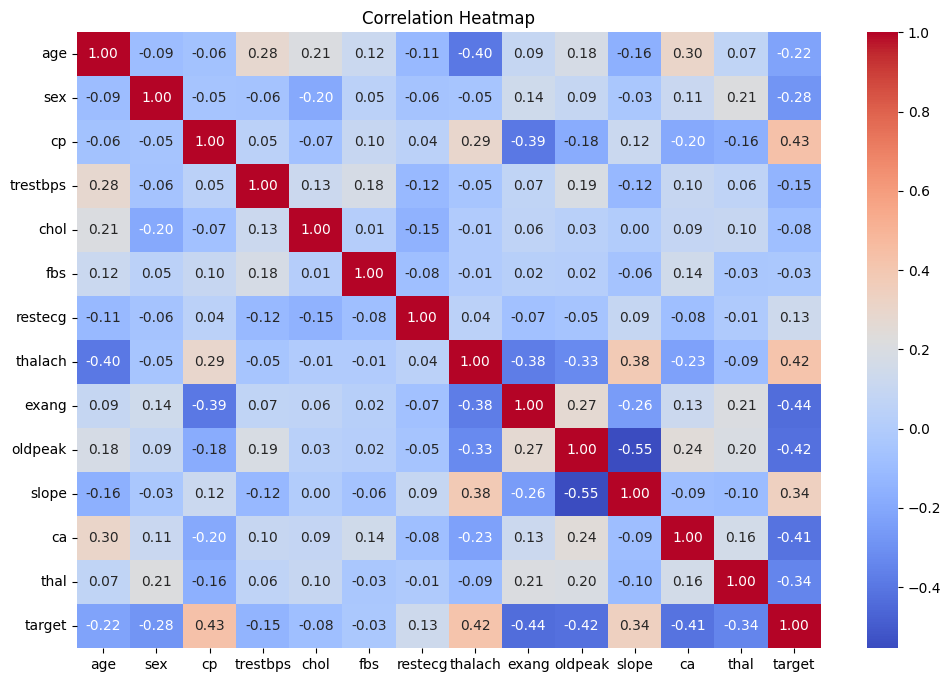

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


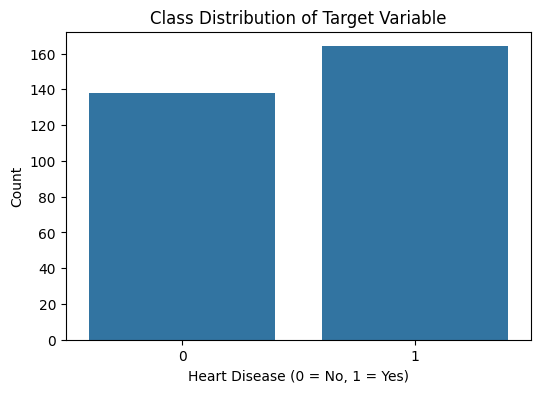

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [44]:
X = df.drop('target', axis=1)
y = df['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25, stratify=y)


In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [48]:
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Evaluation Metrics:
Accuracy: 0.8032786885245902
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1 Score: 0.8333333333333334
Confusion Matrix:
 [[19  9]
 [ 3 30]]


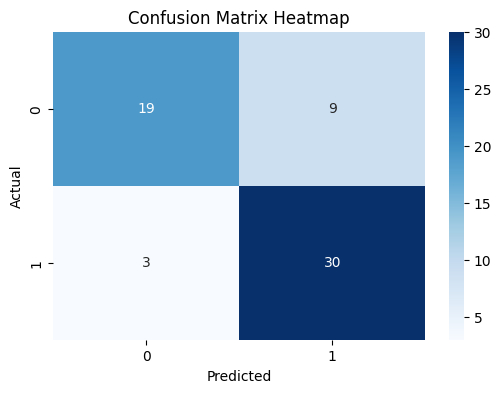

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)


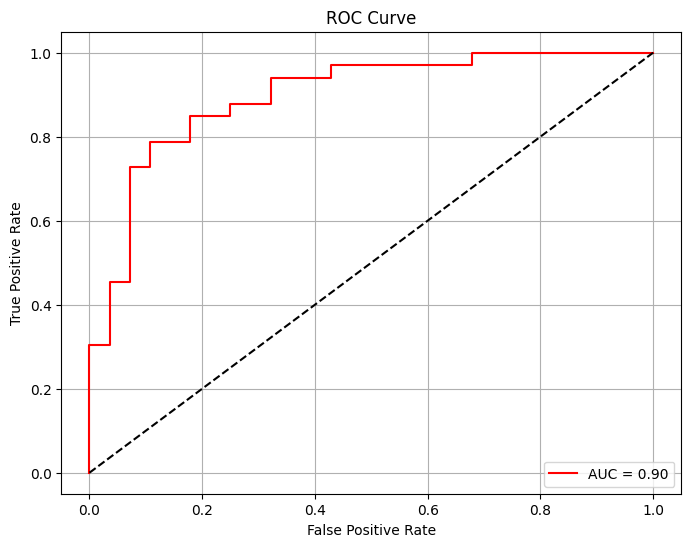

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
